# Prediction of Heat in district heating system using different Machine Learning algorithms and checking their accuracy:


## Step 1: Importing necessary files for model prediction


In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import sklearn.model_selection as ms
import sklearn.linear_model as lm
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from keras.regularizers import l2
from sklearn.metrics import accuracy_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Step 2: Upload dataset as csv file

In [2]:
Data = pd.read_csv("/kaggle/input/heatdemanddataset/HeatDemand(1745).csv")

In [3]:
print(Data)

              Date/Time  Outdoor Temperature  Solar Radiation Rate per Area  \
0       01/01  00:15:00               7.2725                            0.0   
1       01/01  00:30:00               6.0650                            0.0   
2       01/01  00:45:00               4.8575                            0.0   
3       01/01  01:00:00               3.6500                            0.0   
4       01/01  01:15:00               3.8375                            0.0   
...                 ...                  ...                            ...   
70074   12/31  23:00:00               2.1400                            0.0   
70075   12/31  23:15:00               2.3300                            0.0   
70076   12/31  23:30:00               2.5200                            0.0   
70077   12/31  23:45:00               2.7100                            0.0   
70078   12/31  24:00:00               2.9000                            0.0   

       Direct Solar Radiation Rate per Area  Occupa

## Step 3:Pre - processing of the data:

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70079 entries, 0 to 70078
Data columns (total 11 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Date/Time                                       70079 non-null  object 
 1   Outdoor Temperature                             70079 non-null  float64
 2   Solar Radiation Rate per Area                   70079 non-null  float64
 3   Direct Solar Radiation Rate per Area            70079 non-null  float64
 4   Occupant Count                                  70079 non-null  float64
 5   People Sensible Heating Rate                    70079 non-null  float64
 6   Windows Total Transmitted Solar Radiation Rate  70079 non-null  float64
 7   Hot Water Energy                                70079 non-null  float64
 8   Hot Water Rate                                  70079 non-null  float64
 9   Inlet Temperature                      

In [5]:
# Checking are there any missing values:
Data.isna().sum()

Date/Time                                         0
Outdoor Temperature                               0
Solar Radiation Rate per Area                     0
Direct Solar Radiation Rate per Area              0
Occupant Count                                    0
People Sensible Heating Rate                      0
Windows Total Transmitted Solar Radiation Rate    0
Hot Water Energy                                  0
Hot Water Rate                                    0
Inlet Temperature                                 0
class                                             0
dtype: int64

In [6]:
# Checking are there any null values:
Data.isnull().sum()

Date/Time                                         0
Outdoor Temperature                               0
Solar Radiation Rate per Area                     0
Direct Solar Radiation Rate per Area              0
Occupant Count                                    0
People Sensible Heating Rate                      0
Windows Total Transmitted Solar Radiation Rate    0
Hot Water Energy                                  0
Hot Water Rate                                    0
Inlet Temperature                                 0
class                                             0
dtype: int64

In [7]:
# Deleting any empty spaces from the first column:
Data['Date/Time'] = Data['Date/Time'].str.strip()

In [8]:
# Checking are there any duplicate values:
duplicates = Data.pivot_table(index = ['Date/Time', 'Outdoor Temperature', 
                                       'Solar Radiation Rate per Area', 
                                       'Direct Solar Radiation Rate per Area', 
                                       'Occupant Count', 
                                       'People Sensible Heating Rate',
                                       'Windows Total Transmitted Solar Radiation Rate',
                                       'Hot Water Energy', 
                                       'Hot Water Rate', 
                                       'Inlet Temperature' , 
                                       'class'], aggfunc = 'size' )
print(duplicates)

Date/Time        Outdoor Temperature  Solar Radiation Rate per Area  Direct Solar Radiation Rate per Area  Occupant Count  People Sensible Heating Rate  Windows Total Transmitted Solar Radiation Rate  Hot Water Energy  Hot Water Rate  Inlet Temperature  class
01/01  00:15:00  7.2725               0.0                            0.0                                   1.0             80.912482                     0.0                                             500406.3132       556.007015      50                 50       2
01/01  00:30:00  6.0650               0.0                            0.0                                   1.0             79.740535                     0.0                                             474024.5772       526.693975      52                 50       2
01/01  00:45:00  4.8575               0.0                            0.0                                   1.0             78.220023                     0.0                                             365448.87

In [9]:
# Removing duplicate values:
Data = Data.drop_duplicates()
Data

,Date/Time,Outdoor Temperature,Solar Radiation Rate per Area,Direct Solar Radiation Rate per Area,Occupant Count,People Sensible Heating Rate,Windows Total Transmitted Solar Radiation Rate,Hot Water Energy,Hot Water Rate,Inlet Temperature,class
0,01/01 00:15:00,7.2725,0.0,0.0,1.0,80.912482,0.0,500406.3132,556.007015,50,50
1,01/01 00:30:00,6.0650,0.0,0.0,1.0,79.740535,0.0,474024.5772,526.693975,52,50
2,01/01 00:45:00,4.8575,0.0,0.0,1.0,78.220023,0.0,365448.8766,406.054307,56,50
3,01/01 01:00:00,3.6500,0.0,0.0,1.0,77.895519,0.0,276488.1718,307.209080,59,50
4,01/01 01:15:00,3.8375,0.0,0.0,1.0,77.618478,0.0,224995.4725,249.994969,61,61
...,...,...,...,...,...,...,...,...,...,...,...
35035,12/31 23:00:00,2.1400,0.0,0.0,1.0,76.923458,0.0,238868.6237,265.409582,61,61
35036,12/31 23:15:00,2.3300,0.0,0.0,1.0,77.053991,0.0,239238.6102,265.820678,61,61
35037,12/31 23:30:00,2.5200,0.0,0.0,1.0,77.006378,0.0,238473.8181,264.970909,61,61
35038,12/31 23:45:00,2.7100,0.0,0.0,1.0,76.806447,0.0,236891.7890,263.213099,61,61


In [10]:
Data = Data.rename(index={70078:35039})
Data

,Date/Time,Outdoor Temperature,Solar Radiation Rate per Area,Direct Solar Radiation Rate per Area,Occupant Count,People Sensible Heating Rate,Windows Total Transmitted Solar Radiation Rate,Hot Water Energy,Hot Water Rate,Inlet Temperature,class
0,01/01 00:15:00,7.2725,0.0,0.0,1.0,80.912482,0.0,500406.3132,556.007015,50,50
1,01/01 00:30:00,6.0650,0.0,0.0,1.0,79.740535,0.0,474024.5772,526.693975,52,50
2,01/01 00:45:00,4.8575,0.0,0.0,1.0,78.220023,0.0,365448.8766,406.054307,56,50
3,01/01 01:00:00,3.6500,0.0,0.0,1.0,77.895519,0.0,276488.1718,307.209080,59,50
4,01/01 01:15:00,3.8375,0.0,0.0,1.0,77.618478,0.0,224995.4725,249.994969,61,61
...,...,...,...,...,...,...,...,...,...,...,...
35035,12/31 23:00:00,2.1400,0.0,0.0,1.0,76.923458,0.0,238868.6237,265.409582,61,61
35036,12/31 23:15:00,2.3300,0.0,0.0,1.0,77.053991,0.0,239238.6102,265.820678,61,61
35037,12/31 23:30:00,2.5200,0.0,0.0,1.0,77.006378,0.0,238473.8181,264.970909,61,61
35038,12/31 23:45:00,2.7100,0.0,0.0,1.0,76.806447,0.0,236891.7890,263.213099,61,61


In [11]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Date/Time                                       35040 non-null  object 
 1   Outdoor Temperature                             35040 non-null  float64
 2   Solar Radiation Rate per Area                   35040 non-null  float64
 3   Direct Solar Radiation Rate per Area            35040 non-null  float64
 4   Occupant Count                                  35040 non-null  float64
 5   People Sensible Heating Rate                    35040 non-null  float64
 6   Windows Total Transmitted Solar Radiation Rate  35040 non-null  float64
 7   Hot Water Energy                                35040 non-null  float64
 8   Hot Water Rate                                  35040 non-null  float64
 9   Inlet Temperature                      

In [12]:
Data.describe()

,Outdoor Temperature,Solar Radiation Rate per Area,Direct Solar Radiation Rate per Area,Occupant Count,People Sensible Heating Rate,Windows Total Transmitted Solar Radiation Rate,Hot Water Energy,Hot Water Rate,Inlet Temperature,class
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,9.778301,63.357807,97.279060,0.763271,57.325211,166.530989,117700.933834,130.778815,65.390325,65.292180
std,5.934779,94.357632,202.503056,0.312582,23.926332,292.197910,74412.773591,82.680860,2.873735,3.225421
min,-4.230000,0.000000,0.000000,0.000000,0.000000,0.000000,15945.175030,17.716861,50.000000,50.000000
25%,5.410000,0.000000,0.000000,0.500000,38.504211,0.000000,40190.017363,44.655575,63.000000,63.000000
50%,9.320000,0.000000,0.000000,1.000000,71.897686,0.000000,118932.918500,132.147687,65.000000,65.000000
75%,13.940000,104.000000,61.310000,1.000000,77.013944,215.069063,177189.416000,196.877129,68.000000,68.000000
max,26.630000,440.000000,973.610000,1.000000,83.309758,1794.118158,500406.313200,556.007015,69.000000,69.000000


In [13]:
for i in range(len(Data['Date/Time'])):
    month_day, hour_mins_secs = Data['Date/Time'][i].split(' ',1)
    month, day = month_day.split('/')
    hour,mins,secs = hour_mins_secs.split(':')
    hour = hour.lstrip()
    if hour == '24':
        Data['Date/Time'][i] = f'{month}/{day} 00:{mins}:{secs}'

/tmp/ipykernel_31/1030635555.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Date/Time'][i] = f'{month}/{day} 00:{mins}:{secs}'


In [14]:
# convert the date/time column to a timestamp
Data['Timestamp'] = pd.to_datetime(Data['Date/Time'], format='%m/%d %H:%M:%S')
Data['Timestamp']

0       1900-01-01 00:15:00
1       1900-01-01 00:30:00
2       1900-01-01 00:45:00
3       1900-01-01 01:00:00
4       1900-01-01 01:15:00
                ...        
35035   1900-12-31 23:00:00
35036   1900-12-31 23:15:00
35037   1900-12-31 23:30:00
35038   1900-12-31 23:45:00
35039   1900-12-31 00:00:00
Name: Timestamp, Length: 35040, dtype: datetime64[ns]

In [15]:
Data['Timestamp'] = (Data['Timestamp'] - pd.Timestamp("1900-01-01")) // pd.Timedelta('1m')
Data['Timestamp']

0            15
1            30
2            45
3            60
4            75
          ...  
35035    525540
35036    525555
35037    525570
35038    525585
35039    524160
Name: Timestamp, Length: 35040, dtype: int64

In [16]:
for i in range(96,len(Data['Timestamp'])+1,96):
    Data['Timestamp'][i-1] = Data['Timestamp'][i-2] + 15

/tmp/ipykernel_31/3615668841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Timestamp'][i-1] = Data['Timestamp'][i-2] + 15


In [17]:
Data['Timestamp']

0            15
1            30
2            45
3            60
4            75
          ...  
35035    525540
35036    525555
35037    525570
35038    525585
35039    525600
Name: Timestamp, Length: 35040, dtype: int64

In [18]:
Data

,Date/Time,Outdoor Temperature,Solar Radiation Rate per Area,Direct Solar Radiation Rate per Area,Occupant Count,People Sensible Heating Rate,Windows Total Transmitted Solar Radiation Rate,Hot Water Energy,Hot Water Rate,Inlet Temperature,class,Timestamp
0,01/01 00:15:00,7.2725,0.0,0.0,1.0,80.912482,0.0,500406.3132,556.007015,50,50,15
1,01/01 00:30:00,6.0650,0.0,0.0,1.0,79.740535,0.0,474024.5772,526.693975,52,50,30
2,01/01 00:45:00,4.8575,0.0,0.0,1.0,78.220023,0.0,365448.8766,406.054307,56,50,45
3,01/01 01:00:00,3.6500,0.0,0.0,1.0,77.895519,0.0,276488.1718,307.209080,59,50,60
4,01/01 01:15:00,3.8375,0.0,0.0,1.0,77.618478,0.0,224995.4725,249.994969,61,61,75
...,...,...,...,...,...,...,...,...,...,...,...,...
35035,12/31 23:00:00,2.1400,0.0,0.0,1.0,76.923458,0.0,238868.6237,265.409582,61,61,525540
35036,12/31 23:15:00,2.3300,0.0,0.0,1.0,77.053991,0.0,239238.6102,265.820678,61,61,525555
35037,12/31 23:30:00,2.5200,0.0,0.0,1.0,77.006378,0.0,238473.8181,264.970909,61,61,525570
35038,12/31 23:45:00,2.7100,0.0,0.0,1.0,76.806447,0.0,236891.7890,263.213099,61,61,525585


## Step 4: Data Visualization:

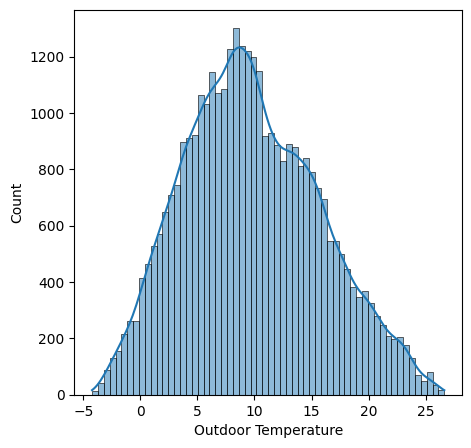

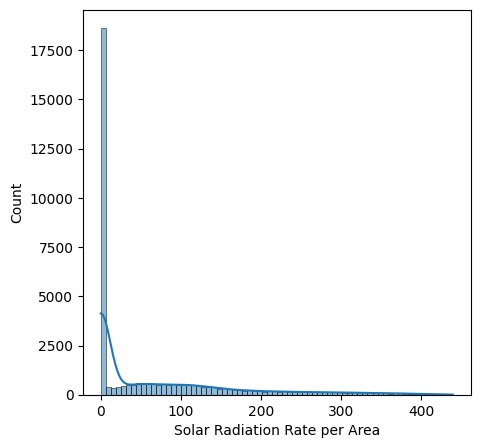

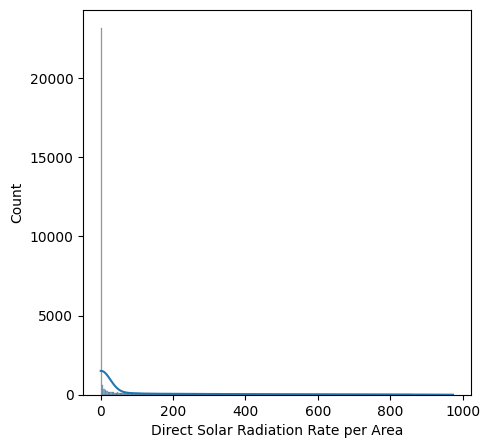

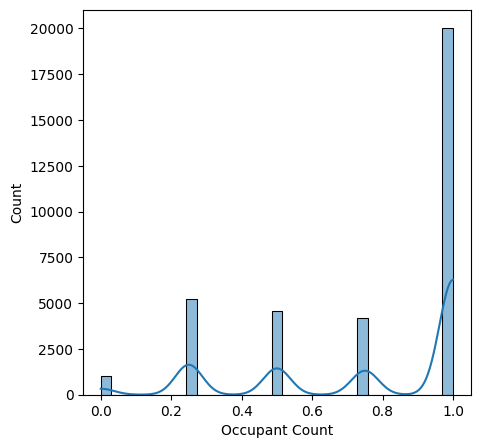

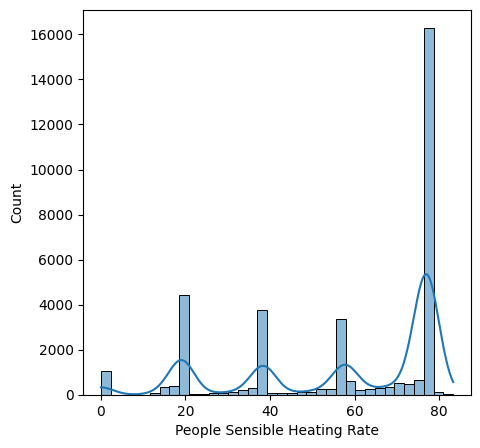

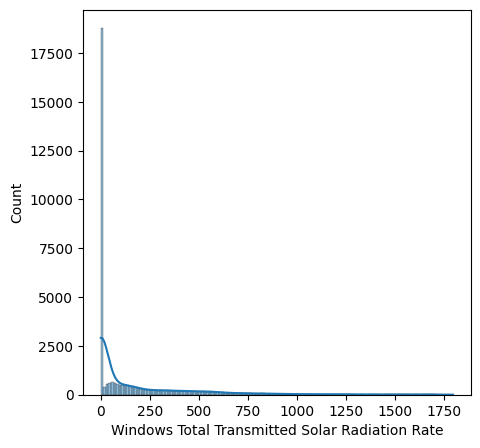

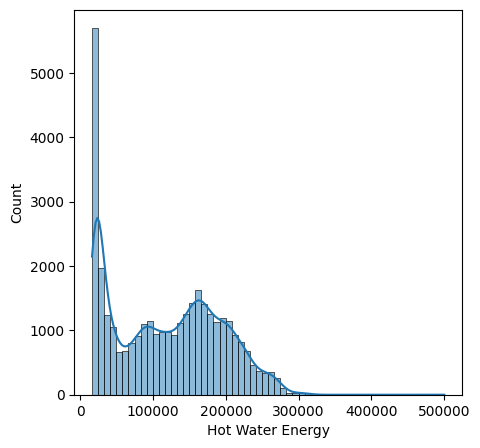

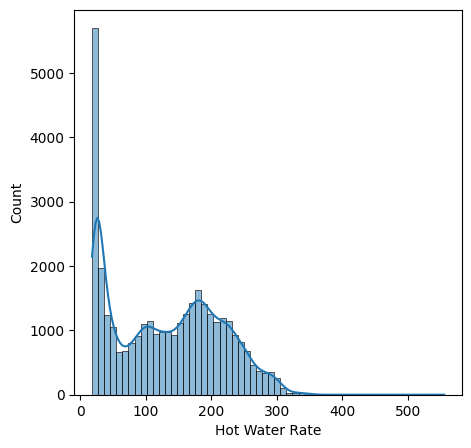

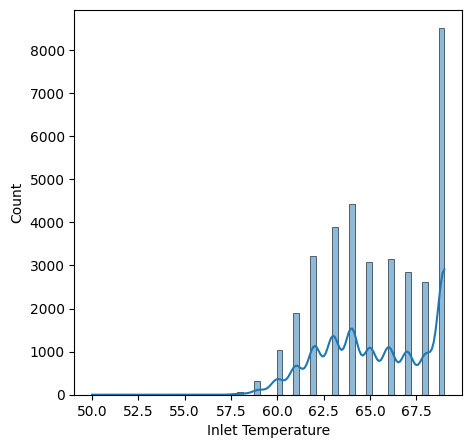

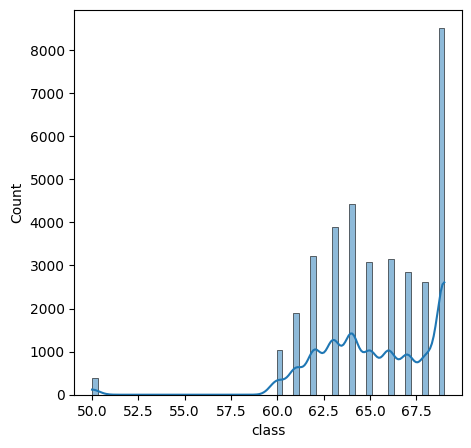

In [19]:
data = Data.drop(['Date/Time','Timestamp'],axis = 1)
for i in data.columns:
    plt.figure(figsize=(5,5))
    sns.histplot(data= data[i], kde= True, multiple='stack')
    plt.show()

In [20]:
data.corr()

,Outdoor Temperature,Solar Radiation Rate per Area,Direct Solar Radiation Rate per Area,Occupant Count,People Sensible Heating Rate,Windows Total Transmitted Solar Radiation Rate,Hot Water Energy,Hot Water Rate,Inlet Temperature,class
Outdoor Temperature,1.000000,0.487246,0.373764,-0.175030,-0.269283,0.436475,-0.915209,-0.915209,0.907640,0.863669
Solar Radiation Rate per Area,0.487246,1.000000,0.443934,-0.379829,-0.395029,0.653559,-0.371611,-0.371611,0.368939,0.342350
Direct Solar Radiation Rate per Area,0.373764,0.443934,1.000000,-0.265090,-0.291969,0.776676,-0.304539,-0.304539,0.300052,0.279326
Occupant Count,-0.175030,-0.379829,-0.265090,1.000000,0.983613,-0.338237,0.040691,0.040691,-0.039730,-0.038324
People Sensible Heating Rate,-0.269283,-0.395029,-0.291969,0.983613,1.000000,-0.362328,0.125016,0.125016,-0.120708,-0.114648
Windows Total Transmitted Solar Radiation Rate,0.436475,0.653559,0.776676,-0.338237,-0.362328,1.000000,-0.361627,-0.361627,0.357880,0.331394
Hot Water Energy,-0.915209,-0.371611,-0.304539,0.040691,0.125016,-0.361627,1.000000,1.000000,-0.995522,-0.953917
Hot Water Rate,-0.915209,-0.371611,-0.304539,0.040691,0.125016,-0.361627,1.000000,1.000000,-0.995522,-0.953917
Inlet Temperature,0.907640,0.368939,0.300052,-0.039730,-0.120708,0.357880,-0.995522,-0.995522,1.000000,0.960453
class,0.863669,0.342350,0.279326,-0.038324,-0.114648,0.331394,-0.953917,-0.953917,0.960453,1.000000


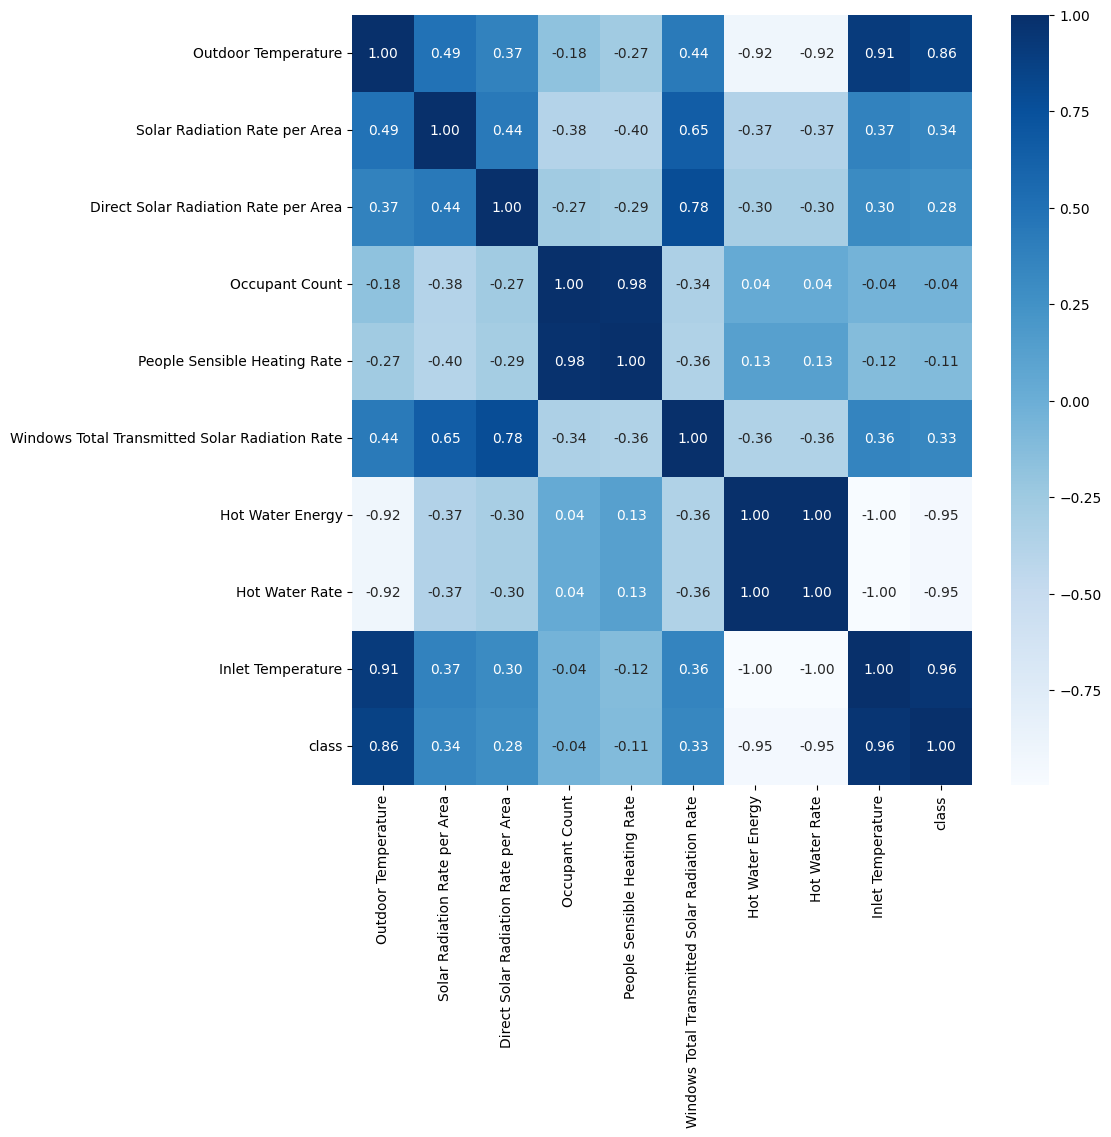

In [21]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot = True, fmt = '.2f',cmap = 'Blues')
plt.show()

### From the heatmap chart it is clearly seen that for predicting the Hot Water Energy, Hot Water Rate and Inlet Temperature the features Occupant count, People Sensible Heating Rate, Solar radiation Rate Per Area, Direct Solar Radiation Rate per Area and Windows Total Transmitted Solar Radiation Rate are not correlated. So, even if we do not consider these features then it will not affect in prediction of the target values.

In [22]:
Data = Data.drop(['Solar Radiation Rate per Area', 
                  'Direct Solar Radiation Rate per Area',
                  'Occupant Count',
                  'People Sensible Heating Rate',
                  'Windows Total Transmitted Solar Radiation Rate'], axis = 1)

In [23]:
Data

,Date/Time,Outdoor Temperature,Hot Water Energy,Hot Water Rate,Inlet Temperature,class,Timestamp
0,01/01 00:15:00,7.2725,500406.3132,556.007015,50,50,15
1,01/01 00:30:00,6.0650,474024.5772,526.693975,52,50,30
2,01/01 00:45:00,4.8575,365448.8766,406.054307,56,50,45
3,01/01 01:00:00,3.6500,276488.1718,307.209080,59,50,60
4,01/01 01:15:00,3.8375,224995.4725,249.994969,61,61,75
...,...,...,...,...,...,...,...
35035,12/31 23:00:00,2.1400,238868.6237,265.409582,61,61,525540
35036,12/31 23:15:00,2.3300,239238.6102,265.820678,61,61,525555
35037,12/31 23:30:00,2.5200,238473.8181,264.970909,61,61,525570
35038,12/31 23:45:00,2.7100,236891.7890,263.213099,61,61,525585


## Step 5: Train Test Splitting of the data

In [24]:
# Split the dataset into features and targets
X = Data[['Date/Time','Timestamp','Outdoor Temperature','class']]
Y = Data[['Hot Water Energy','Hot Water Rate','Inlet Temperature']]

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y ,test_size = 0.3, random_state = 0)

In [26]:
X_train_new = X_train.drop(['Date/Time'],axis = 1)
X_train_new

,Timestamp,Outdoor Temperature,class
679,10200,6.9100,64
18784,281775,21.5375,69
24093,361410,9.0650,69
19057,285870,25.4150,69
15253,228810,12.1800,67
...,...,...,...
20757,311370,13.9550,69
32103,481560,3.8000,61
30403,456060,5.4900,64
21243,318660,18.0500,69


In [27]:
X_test_new = X_test.drop(['Date/Time'],axis = 1)
X_test_new

,Timestamp,Outdoor Temperature,class
5063,75960,4.6000,63
35039,525600,2.9000,61
22416,336255,19.9900,69
13063,195960,2.8300,63
32985,494790,3.0000,61
...,...,...,...
18952,284295,23.8700,69
34881,523230,-1.1050,50
11455,171840,9.2500,63
13266,199005,9.3925,66


In [28]:
Y_train

,Hot Water Energy,Hot Water Rate,Inlet Temperature
679,167011.16410,185.567960,64
18784,17961.53097,19.957257,69
24093,24698.08195,27.442313,69
19057,18534.69360,20.594104,69
15253,85930.68769,95.478542,67
...,...,...,...
20757,34277.95183,38.086613,69
32103,233371.48430,259.301649,61
30403,151717.61830,168.575131,64
21243,30346.42063,33.718245,69


In [29]:
Y_test

,Hot Water Energy,Hot Water Rate,Inlet Temperature
5063,183529.17760,203.921308,63
35039,237293.21790,263.659131,61
22416,19681.78792,21.868653,69
13063,171645.43320,190.717148,63
32985,227977.02230,253.307803,61
...,...,...,...
18952,17167.66087,19.075179,69
34881,275660.79860,306.289776,59
11455,175346.97260,194.829970,63
13266,113704.64580,126.338495,66


In [30]:
np.shape(X_train_new), np.shape(X_test_new), np.shape(Y_train), np.shape(Y_test)

((24528, 3), (10512, 3), (24528, 3), (10512, 3))

## Step 6: Applying Models

## Model 1: Linear Regression

In [52]:
LR =lm.LinearRegression()
LR.fit(X_train_new,Y_train)

LinearRegression()

In [53]:
LR.coef_

array([[    -0.00786664,  -4376.88581867, -15075.79678128],
       [    -0.00000874,     -4.86320647,    -16.75088531],
       [     0.00000035,      0.14318793,      0.6293663 ]])

In [54]:
results = ms.cross_val_score(LR, X_train_new,Y_train, cv=5)
print(results)
print ("Model Score=", results.mean())

[0.94587664 0.9444346  0.94717534 0.93556997 0.95077178]
Model Score= 0.9447656664728482


In [55]:
Y_Pred1 = LR.predict(X_test_new)
np.set_printoptions(suppress=True)
print(Y_Pred1)

[[176468.41194792    196.07601327     63.13672857]
 [210523.55439628    233.91506044     61.793851  ]
 [ 16605.71087536     18.45078986     69.20879205]
 ...
 [155361.63923546    172.6240436      63.8365157 ]
 [109296.84532666    121.44093925     65.75464144]
 [255270.38395408    283.63375995     60.15532448]]


In [56]:
Error = Y_test - Y_Pred1
print(Error)

       Hot Water Energy  Hot Water Rate  Inlet Temperature
5063        7060.765652        7.845295          -0.136729
35039      26769.663504       29.744071          -0.793851
22416       3076.077045        3.417863          -0.208792
13063     -11626.069581      -12.917855           0.074207
32985      17648.785239       19.609761          -0.797256
...                 ...             ...                ...
18952      17135.516242       19.039462          -0.745956
34881    -118244.592036     -131.382880           4.703485
11455      19985.333365       22.205926          -0.836516
13266       4407.800473        4.897556           0.245359
8554        2902.505946        3.225007          -0.155324

[10512 rows x 3 columns]


In [57]:
results_linear = pd.concat([pd.DataFrame(np.array(Y_test['Hot Water Energy']),columns = ['Test_HWE']), 
                     pd.DataFrame(np.array(Y_test['Hot Water Rate']),columns = ['Test_HWR']),
                     pd.DataFrame(np.array(Y_test['Inlet Temperature']),columns = ['Test_IT']),
                     pd.DataFrame(np.array(Y_Pred1[:,0]),columns = ['Pred_HWE']),
                     pd.DataFrame(np.array(Y_Pred1[:,1]),columns = ['Pred_HWR']),
                     pd.DataFrame(np.array(Y_Pred1[:,2]),columns = ['Pred_IT']),
                     pd.DataFrame(np.array(X_test['Date/Time']),columns = ['Timestamp'])], axis = 1)
results_linear.index = Y_test.index

In [58]:
results_linear = results_linear.sort_index(ascending =True)
results_linear

,Test_HWE,Test_HWR,Test_IT,Pred_HWE,Pred_HWR,Pred_IT,Timestamp
3,276488.1718,307.209080,59,377208.889776,419.120989,54.792052,01/01 01:00:00
4,224995.4725,249.994969,61,210554.341092,233.949268,61.741935,01/01 01:15:00
6,200673.2760,222.970307,62,193836.976129,215.374418,62.425007,01/01 01:45:00
7,199227.9614,221.364402,62,193016.192039,214.462436,62.451860,01/01 02:00:00
17,194915.0642,216.572294,62,184808.351132,205.342612,62.720391,01/01 04:30:00
...,...,...,...,...,...,...,...
35028,243108.7011,270.120779,61,219595.948251,243.995498,61.497036,12/31 21:15:00
35032,241859.3820,268.732647,61,216312.811889,240.347569,61.604448,12/31 22:15:00
35035,238868.6237,265.409582,61,213850.459617,237.611622,61.685007,12/31 23:00:00
35036,239238.6102,265.820678,61,213018.733312,236.687481,61.712218,12/31 23:15:00


In [59]:
results_linear['Timestamp'] = pd.to_datetime(results_linear['Timestamp'], format='%m/%d %H:%M:%S')
results_linear

,Test_HWE,Test_HWR,Test_IT,Pred_HWE,Pred_HWR,Pred_IT,Timestamp
3,276488.1718,307.209080,59,377208.889776,419.120989,54.792052,1900-01-01 01:00:00
4,224995.4725,249.994969,61,210554.341092,233.949268,61.741935,1900-01-01 01:15:00
6,200673.2760,222.970307,62,193836.976129,215.374418,62.425007,1900-01-01 01:45:00
7,199227.9614,221.364402,62,193016.192039,214.462436,62.451860,1900-01-01 02:00:00
17,194915.0642,216.572294,62,184808.351132,205.342612,62.720391,1900-01-01 04:30:00
...,...,...,...,...,...,...,...
35028,243108.7011,270.120779,61,219595.948251,243.995498,61.497036,1900-12-31 21:15:00
35032,241859.3820,268.732647,61,216312.811889,240.347569,61.604448,1900-12-31 22:15:00
35035,238868.6237,265.409582,61,213850.459617,237.611622,61.685007,1900-12-31 23:00:00
35036,239238.6102,265.820678,61,213018.733312,236.687481,61.712218,1900-12-31 23:15:00


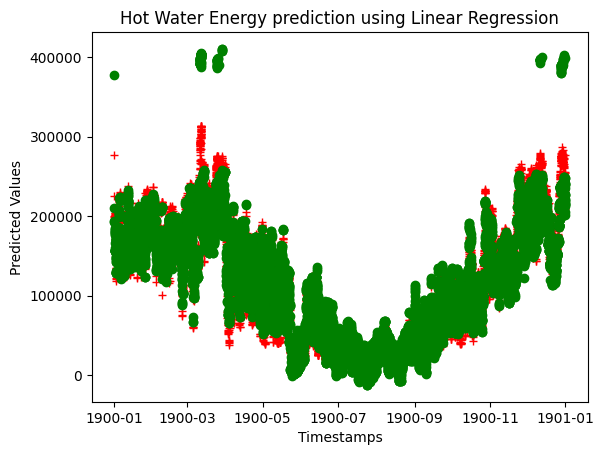

In [60]:
plt.plot(results_linear['Timestamp'],results_linear['Test_HWE'],'r+')
plt.plot(results_linear['Timestamp'],results_linear['Pred_HWE'],'go')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Hot Water Energy prediction using Linear Regression')
plt.show()

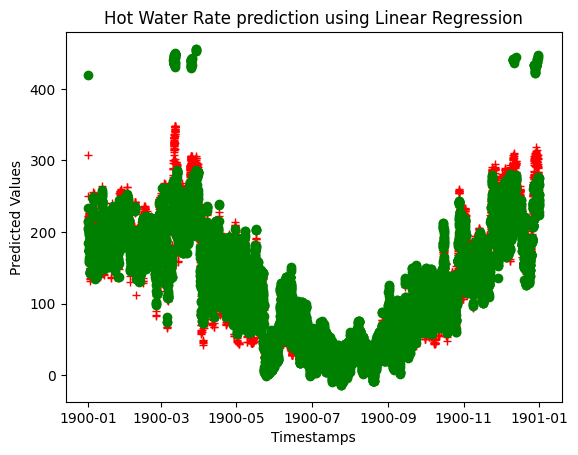

In [61]:
plt.plot(results_linear['Timestamp'],results_linear['Test_HWR'],'r+')
plt.plot(results_linear['Timestamp'],results_linear['Pred_HWR'],'go')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Hot Water Rate prediction using Linear Regression')
plt.show()

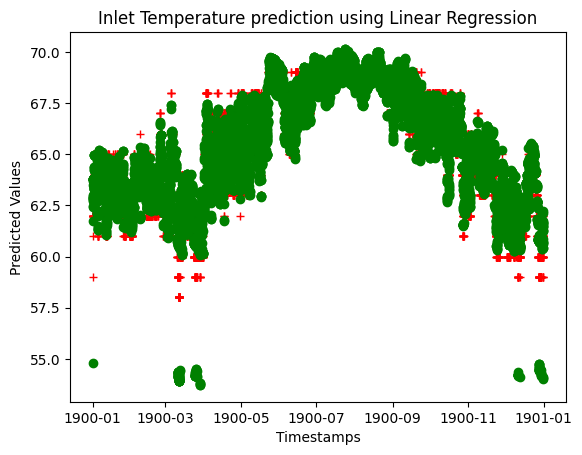

In [62]:
plt.plot(results_linear['Timestamp'],results_linear['Test_IT'],'r+')
plt.plot(results_linear['Timestamp'],results_linear['Pred_IT'],'go')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Inlet Temperature prediction using Linear Regression')
plt.show()

## Model 2: Ridge Regression Model

In [63]:
model_ridge = lm.Ridge(alpha = 10)

model_ridge = model_ridge.fit(X_train_new, Y_train)

In [64]:
Y_Pred2 = model_ridge.predict(X_test_new)
Y_Pred2

array([[176468.38949011,    196.07598832,     63.13672734],
       [210521.0351543 ,    233.91226128,     61.79395517],
       [ 16604.03661775,     18.44892958,     69.20886962],
       ...,
       [155357.40180165,    172.61933534,     63.83669864],
       [109298.6349213 ,    121.44292769,     65.75456419],
       [255271.27523127,    283.63475026,     60.15527943]])

In [65]:
results = ms.cross_val_score(model_ridge, X_train_new,Y_train, cv=5)
print (results)
print ("Model Score=", results.mean())

[0.94587555 0.94443558 0.9471735  0.93557651 0.95076819]
Model Score= 0.944765865797484


In [66]:
Error = Y_test -Y_Pred2
print(Error)

       Hot Water Energy  Hot Water Rate  Inlet Temperature
5063        7060.788110        7.845320          -0.136727
35039      26772.182746       29.746870          -0.793955
22416       3077.751302        3.419724          -0.208870
13063     -11627.672277      -12.919636           0.074280
32985      17651.399483       19.612666          -0.797364
...                 ...             ...                ...
18952      17140.725003       19.045250          -0.746188
34881    -118223.152797     -131.359059           4.702567
11455      19989.570798       22.210634          -0.836699
13266       4406.010879        4.895568           0.245436
8554        2901.614669        3.224016          -0.155279

[10512 rows x 3 columns]


In [67]:
results_Ridge = pd.concat([pd.DataFrame(np.array(Y_test['Hot Water Energy']),columns = ['Test_HWE']), 
                     pd.DataFrame(np.array(Y_test['Hot Water Rate']),columns = ['Test_HWR']),
                     pd.DataFrame(np.array(Y_test['Inlet Temperature']),columns = ['Test_IT']),
                     pd.DataFrame(np.array(Y_Pred2[:,0]),columns = ['Pred_HWE']),
                     pd.DataFrame(np.array(Y_Pred2[:,1]),columns = ['Pred_HWR']),
                     pd.DataFrame(np.array(Y_Pred2[:,2]),columns = ['Pred_IT']),
                     pd.DataFrame(np.array(X_test['Date/Time']),columns = ['Timestamp'])], axis = 1)
results_Ridge.index = Y_test.index

In [68]:
results_Ridge = results_Ridge.sort_index(ascending =True)
results_Ridge

,Test_HWE,Test_HWR,Test_IT,Pred_HWE,Pred_HWR,Pred_IT,Timestamp
3,276488.1718,307.209080,59,377183.058040,419.092287,54.793165,01/01 01:00:00
4,224995.4725,249.994969,61,210550.899834,233.945444,61.742081,01/01 01:15:00
6,200673.2760,222.970307,62,193835.244928,215.372494,62.425080,01/01 01:45:00
7,199227.9614,221.364402,62,193014.290369,214.460323,62.451940,01/01 02:00:00
17,194915.0642,216.572294,62,184804.744770,205.338605,62.720545,01/01 04:30:00
...,...,...,...,...,...,...,...
35028,243108.7011,270.120779,61,219595.313262,243.994793,61.497057,12/31 21:15:00
35032,241859.3820,268.732647,61,216311.495023,240.346106,61.604499,12/31 22:15:00
35035,238868.6237,265.409582,61,213848.631344,237.609590,61.685081,12/31 23:00:00
35036,239238.6102,265.820678,61,213016.732296,236.685258,61.712299,12/31 23:15:00


In [69]:
results_Ridge['Timestamp'] = pd.to_datetime(results_Ridge['Timestamp'], format='%m/%d %H:%M:%S')
results_Ridge

,Test_HWE,Test_HWR,Test_IT,Pred_HWE,Pred_HWR,Pred_IT,Timestamp
3,276488.1718,307.209080,59,377183.058040,419.092287,54.793165,1900-01-01 01:00:00
4,224995.4725,249.994969,61,210550.899834,233.945444,61.742081,1900-01-01 01:15:00
6,200673.2760,222.970307,62,193835.244928,215.372494,62.425080,1900-01-01 01:45:00
7,199227.9614,221.364402,62,193014.290369,214.460323,62.451940,1900-01-01 02:00:00
17,194915.0642,216.572294,62,184804.744770,205.338605,62.720545,1900-01-01 04:30:00
...,...,...,...,...,...,...,...
35028,243108.7011,270.120779,61,219595.313262,243.994793,61.497057,1900-12-31 21:15:00
35032,241859.3820,268.732647,61,216311.495023,240.346106,61.604499,1900-12-31 22:15:00
35035,238868.6237,265.409582,61,213848.631344,237.609590,61.685081,1900-12-31 23:00:00
35036,239238.6102,265.820678,61,213016.732296,236.685258,61.712299,1900-12-31 23:15:00


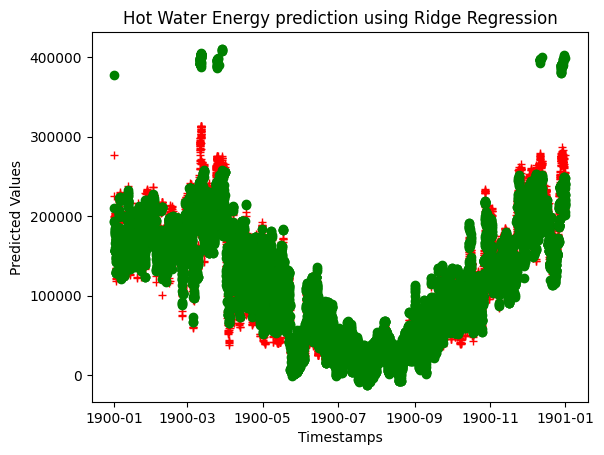

In [70]:
plt.plot(results_Ridge['Timestamp'],results_Ridge['Test_HWE'],'r+')
plt.plot(results_Ridge['Timestamp'],results_Ridge['Pred_HWE'],'go')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Hot Water Energy prediction using Ridge Regression')
plt.show()

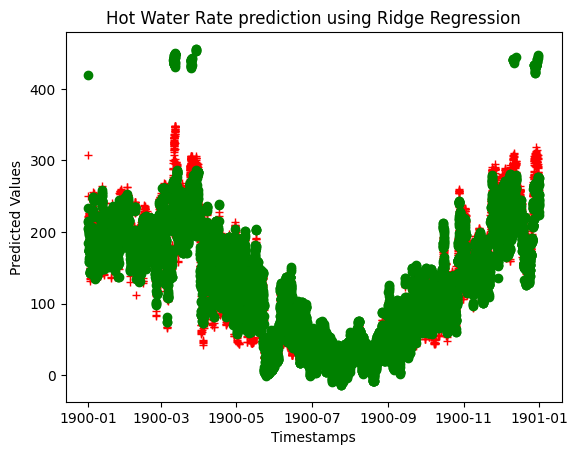

In [71]:
plt.plot(results_Ridge['Timestamp'],results_Ridge['Test_HWR'],'r+')
plt.plot(results_Ridge['Timestamp'],results_Ridge['Pred_HWR'],'go')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Hot Water Rate prediction using Ridge Regression')
plt.show()

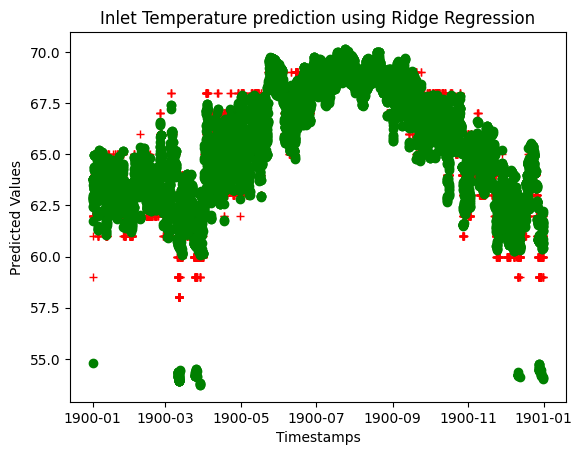

In [72]:
plt.plot(results_Ridge['Timestamp'],results_Ridge['Test_IT'],'r+')
plt.plot(results_Ridge['Timestamp'],results_Ridge['Pred_IT'],'go')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Inlet Temperature prediction using Ridge Regression')
plt.show()

## Model 3: Random Forest Regressor

In [73]:
RFR = RandomForestRegressor(random_state=0)
RFR = RFR.fit(X_train_new, Y_train)

RFR_score = RFR.score(X_train_new, Y_train)
print(RFR_score)

0.9998264325382857


In [74]:
Y_Pred3 = RFR.predict(X_test_new)
print(Y_Pred3)

[[184621.263908      205.13473768     63.        ]
 [233317.637223      259.24181914     61.        ]
 [ 19611.0507245      21.79005636     69.        ]
 ...
 [172150.165764      191.27796195     63.        ]
 [106511.2795544     118.34586613     66.        ]
 [255564.784264      283.96087144     60.        ]]


In [75]:
results = ms.cross_val_score(RFR, X_train_new,Y_train, cv=5)
print(results)
print ("Model Score=", results.mean())

[0.9982501  0.99841899 0.99872011 0.99859078 0.9987316 ]
Model Score= 0.998542316856317


In [76]:
Error = Y_test -Y_Pred3
print(Error)

       Hot Water Energy  Hot Water Rate  Inlet Temperature
5063       -1092.086308       -1.213429                0.0
35039       3975.580677        4.417312                0.0
22416         70.737195        0.078597                0.0
13063      -2470.724117       -2.745249                0.0
32985        552.322349        0.613692                0.0
...                 ...             ...                ...
18952       -207.281828       -0.230313                0.0
34881      -1337.388181       -1.485987                0.0
11455       3196.806836        3.552008                0.0
13266       7193.366246        7.992629                0.0
8554        2608.105636        2.897895                0.0

[10512 rows x 3 columns]


In [77]:
results_RFR = pd.concat([pd.DataFrame(np.array(Y_test['Hot Water Energy']),columns = ['Test_HWE']), 
                     pd.DataFrame(np.array(Y_test['Hot Water Rate']),columns = ['Test_HWR']),
                     pd.DataFrame(np.array(Y_test['Inlet Temperature']),columns = ['Test_IT']),
                     pd.DataFrame(np.array(Y_Pred3[:,0]),columns = ['Pred_HWE']),
                     pd.DataFrame(np.array(Y_Pred3[:,1]),columns = ['Pred_HWR']),
                     pd.DataFrame(np.array(Y_Pred3[:,2]),columns = ['Pred_IT']),
                     pd.DataFrame(np.array(X_test['Date/Time']),columns = ['Timestamp'])], axis = 1)
results_RFR.index = Y_test.index

In [78]:
results_RFR = results_RFR.sort_index(ascending =True)
results_RFR

,Test_HWE,Test_HWR,Test_IT,Pred_HWE,Pred_HWR,Pred_IT,Timestamp
3,276488.1718,307.209080,59,362016.224480,402.240249,55.95,01/01 01:00:00
4,224995.4725,249.994969,61,221442.893573,246.047659,61.00,01/01 01:15:00
6,200673.2760,222.970307,62,199693.831281,221.882035,62.00,01/01 01:45:00
7,199227.9614,221.364402,62,200703.416262,223.003796,62.00,01/01 02:00:00
17,194915.0642,216.572294,62,195155.857040,216.839841,62.00,01/01 04:30:00
...,...,...,...,...,...,...,...
35028,243108.7011,270.120779,61,238749.381098,265.277090,61.00,12/31 21:15:00
35032,241859.3820,268.732647,61,240675.581524,267.417313,61.00,12/31 22:15:00
35035,238868.6237,265.409582,61,239223.874049,265.804305,61.00,12/31 23:00:00
35036,239238.6102,265.820678,61,237939.806749,264.377563,61.00,12/31 23:15:00


In [79]:
results_RFR['Timestamp'] = pd.to_datetime(results_RFR['Timestamp'], format='%m/%d %H:%M:%S')
results_RFR

,Test_HWE,Test_HWR,Test_IT,Pred_HWE,Pred_HWR,Pred_IT,Timestamp
3,276488.1718,307.209080,59,362016.224480,402.240249,55.95,1900-01-01 01:00:00
4,224995.4725,249.994969,61,221442.893573,246.047659,61.00,1900-01-01 01:15:00
6,200673.2760,222.970307,62,199693.831281,221.882035,62.00,1900-01-01 01:45:00
7,199227.9614,221.364402,62,200703.416262,223.003796,62.00,1900-01-01 02:00:00
17,194915.0642,216.572294,62,195155.857040,216.839841,62.00,1900-01-01 04:30:00
...,...,...,...,...,...,...,...
35028,243108.7011,270.120779,61,238749.381098,265.277090,61.00,1900-12-31 21:15:00
35032,241859.3820,268.732647,61,240675.581524,267.417313,61.00,1900-12-31 22:15:00
35035,238868.6237,265.409582,61,239223.874049,265.804305,61.00,1900-12-31 23:00:00
35036,239238.6102,265.820678,61,237939.806749,264.377563,61.00,1900-12-31 23:15:00


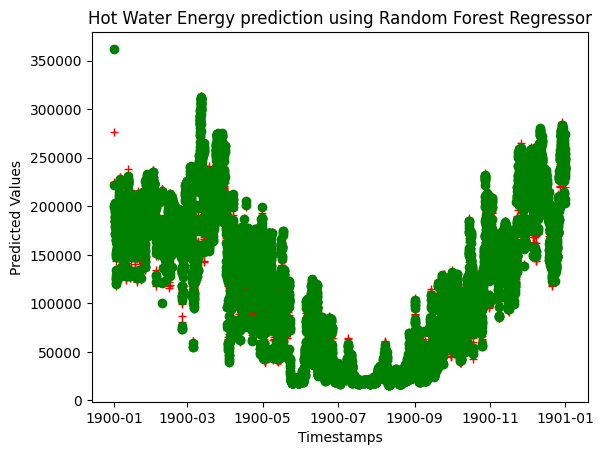

In [80]:
plt.plot(results_RFR['Timestamp'],results_RFR['Test_HWE'],'r+')
plt.plot(results_RFR['Timestamp'],results_RFR['Pred_HWE'],'go')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Hot Water Energy prediction using Random Forest Regressor')
plt.show()

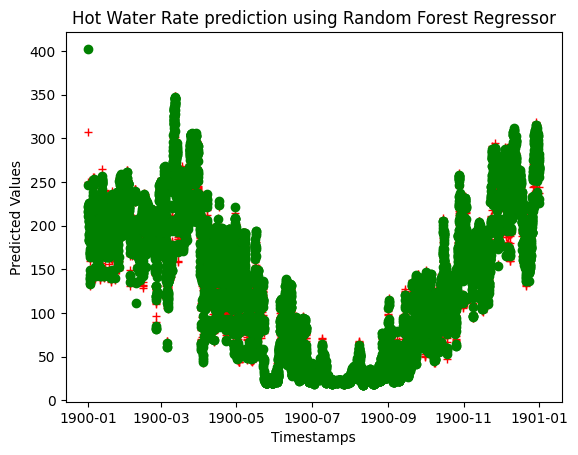

In [81]:
plt.plot(results_RFR['Timestamp'],results_RFR['Test_HWR'],'r+')
plt.plot(results_RFR['Timestamp'],results_RFR['Pred_HWR'],'go')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Hot Water Rate prediction using Random Forest Regressor')
plt.show()

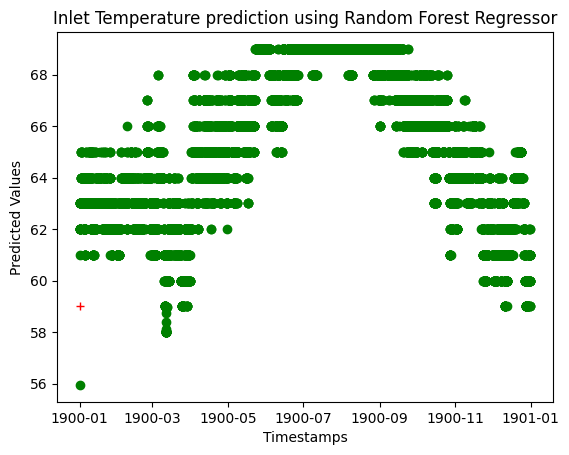

In [82]:
plt.plot(results_RFR['Timestamp'],results_RFR['Test_IT'],'r+')
plt.plot(results_RFR['Timestamp'],results_RFR['Pred_IT'],'go')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Inlet Temperature prediction using Random Forest Regressor')
plt.show()

## Model 4: Lasso Regression Model

In [83]:
model_lasso = lm.Lasso(alpha = 10)

model_lasso = model_lasso.fit(X_train_new, Y_train)

In [116]:
Y_Pred4 = model_lasso.predict(X_test_new)
print(Y_Pred4)

[[176467.4210417     195.08506938     64.25814577]
 [210519.01502075    229.37565923     64.88902989]
 [ 16606.36716557     19.10722616     67.03848826]
 ...
 [155357.40182639    168.38675206     65.13200045]
 [109298.63597683    123.23154208     65.20628226]
 [255268.37946084    281.62911853     63.21550974]]


In [117]:
results = ms.cross_val_score(model_lasso, X_train_new,Y_train, cv=5)
print(results)
print ("Model Score=", results.mean())

[0.78734001 0.78574447 0.7869035  0.77708757 0.78930785]
Model Score= 0.7852766782378103


In [118]:
Error = Y_test -Y_Pred4
print(Error)

       Hot Water Energy  Hot Water Rate  Inlet Temperature
5063        7061.756558        8.836239          -1.258146
35039      26774.202879       34.283472          -3.889030
22416       3075.420754        2.761427           1.961512
13063     -11626.111235      -12.959398          -1.232366
32985      17653.351749       24.176290          -3.843369
...                 ...             ...                ...
18952      17137.397511       20.920445           1.491105
34881    -118220.161667     -106.952959          -5.293659
11455      19989.570774       26.443218          -2.132000
13266       4406.009823        3.106953           0.793718
8554        2904.510439        5.229648          -3.215510

[10512 rows x 3 columns]


In [119]:
results_Lasso = pd.concat([pd.DataFrame(np.array(Y_test['Hot Water Energy']),columns = ['Test_HWE']), 
                     pd.DataFrame(np.array(Y_test['Hot Water Rate']),columns = ['Test_HWR']),
                     pd.DataFrame(np.array(Y_test['Inlet Temperature']),columns = ['Test_IT']),
                     pd.DataFrame(np.array(Y_Pred4[:,0]),columns = ['Pred_HWE']),
                     pd.DataFrame(np.array(Y_Pred4[:,1]),columns = ['Pred_HWR']),
                     pd.DataFrame(np.array(Y_Pred4[:,2]),columns = ['Pred_IT']),
                     pd.DataFrame(np.array(X_test['Date/Time']),columns = ['Timestamp'])], axis = 1)
results_Lasso.index = Y_test.index

In [120]:
results_Lasso = results_Lasso.sort_index(ascending =True)
results_Lasso

,Test_HWE,Test_HWR,Test_IT,Pred_HWE,Pred_HWR,Pred_IT,Timestamp
3,276488.1718,307.209080,59,377181.946225,392.178098,63.969204,01/01 01:00:00
4,224995.4725,249.994969,61,210549.854657,229.462887,63.996889,01/01 01:15:00
6,200673.2760,222.970307,62,193834.290883,212.689183,64.052259,01/01 01:45:00
7,199227.9614,221.364402,62,193013.380886,211.651301,64.079944,01/01 02:00:00
17,194915.0642,216.572294,62,184804.280912,201.272475,64.356794,01/01 04:30:00
...,...,...,...,...,...,...,...
35028,243108.7011,270.120779,61,219592.800565,240.847713,64.583020,12/31 21:15:00
35032,241859.3820,268.732647,61,216309.160575,236.696183,64.693760,12/31 22:15:00
35035,238868.6237,265.409582,61,213846.430583,233.582535,64.776815,12/31 23:00:00
35036,239238.6102,265.820678,61,213014.576692,232.530816,64.804869,12/31 23:15:00


In [121]:
results_Lasso['Timestamp'] = pd.to_datetime(results_Lasso['Timestamp'], format='%m/%d %H:%M:%S')
results_Lasso

,Test_HWE,Test_HWR,Test_IT,Pred_HWE,Pred_HWR,Pred_IT,Timestamp
3,276488.1718,307.209080,59,377181.946225,392.178098,63.969204,1900-01-01 01:00:00
4,224995.4725,249.994969,61,210549.854657,229.462887,63.996889,1900-01-01 01:15:00
6,200673.2760,222.970307,62,193834.290883,212.689183,64.052259,1900-01-01 01:45:00
7,199227.9614,221.364402,62,193013.380886,211.651301,64.079944,1900-01-01 02:00:00
17,194915.0642,216.572294,62,184804.280912,201.272475,64.356794,1900-01-01 04:30:00
...,...,...,...,...,...,...,...
35028,243108.7011,270.120779,61,219592.800565,240.847713,64.583020,1900-12-31 21:15:00
35032,241859.3820,268.732647,61,216309.160575,236.696183,64.693760,1900-12-31 22:15:00
35035,238868.6237,265.409582,61,213846.430583,233.582535,64.776815,1900-12-31 23:00:00
35036,239238.6102,265.820678,61,213014.576692,232.530816,64.804869,1900-12-31 23:15:00


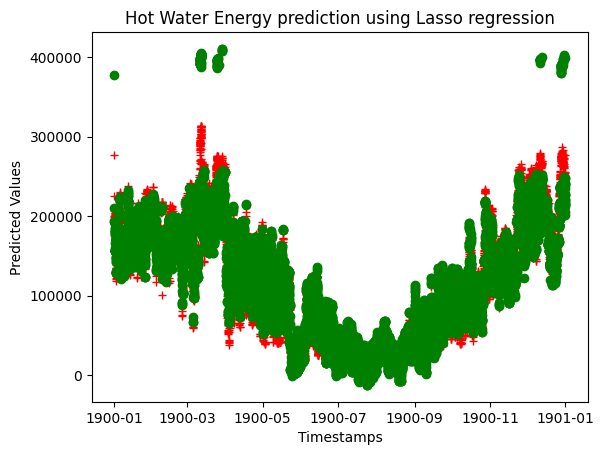

In [122]:
plt.plot(results_Lasso['Timestamp'],results_Lasso['Test_HWE'],'r+')
plt.plot(results_Lasso['Timestamp'],results_Lasso['Pred_HWE'],'go')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Hot Water Energy prediction using Lasso regression')
plt.show()

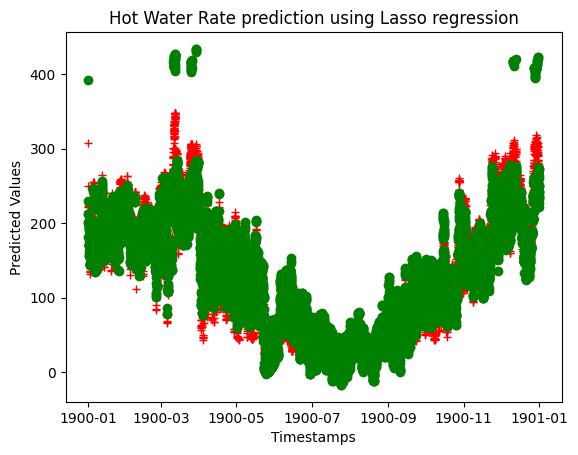

In [123]:
plt.plot(results_Lasso['Timestamp'],results_Lasso['Test_HWR'],'r+')
plt.plot(results_Lasso['Timestamp'],results_Lasso['Pred_HWR'],'go')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Hot Water Rate prediction using Lasso regression')
plt.show()

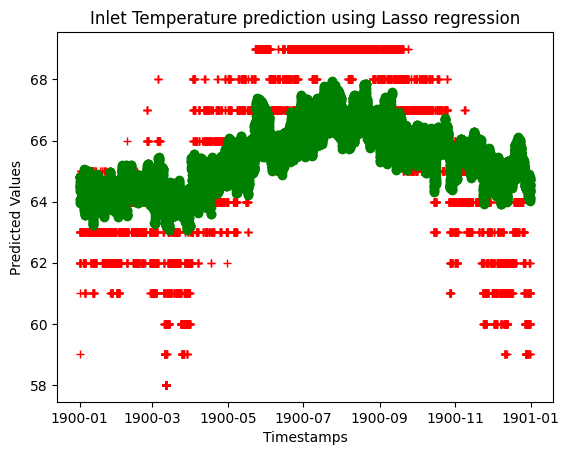

In [124]:
plt.plot(results_Lasso['Timestamp'],results_Lasso['Test_IT'],'r+')
plt.plot(results_Lasso['Timestamp'],results_Lasso['Pred_IT'],'go')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Inlet Temperature prediction using Lasso regression')
plt.show()

## Model 5: Arificial Nueral Network (ANN)

In [93]:

def ANN():
    ann_model = Sequential()
    ann_model.add(Dense(150, input_dim=X_train_new.shape[1], activation='linear', kernel_regularizer=l2(0.01)))
    ann_model.add(Dropout(0.2))
    ann_model.add(Dense(50, activation='linear', kernel_regularizer=l2(0.01)))
    ann_model.add(Dropout(0.2))
    ann_model.add(Dense(3, activation='linear', kernel_regularizer=l2(0.01)))
    ann_model.add(Dropout(0.1))
                  
    ann_model.compile(loss='mse', optimizer='adam' , metrics = ['accuracy'])
    
    return ann_model

In [94]:
ann_modelCV= KerasRegressor(build_fn = ANN , verbose = 0)

/tmp/ipykernel_31/1277478148.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_modelCV= KerasRegressor(build_fn = ANN , verbose = 0)


In [95]:
batches = [50,100,150,200,250]
epochs = [30,50,70,90,100]
param_grid = dict(epochs=epochs, batch_size =batches)

In [96]:
grid= GridSearchCV(estimator = ann_modelCV, param_grid = param_grid,cv = 5)

In [97]:
grid_result = grid.fit(X_train_new,Y_train)

In [98]:
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean,std,param in zip(means,stds,params):
    print(f'mean = {mean:.4}, std ={std:.4} using {param}')

Best Accuracy for -4.857e+08 using {'batch_size': 150, 'epochs': 100}
mean = -1.285e+09, std =5.644e+08 using {'batch_size': 50, 'epochs': 30}
mean = -6.648e+08, std =1.942e+08 using {'batch_size': 50, 'epochs': 50}
mean = -6.187e+08, std =1.58e+08 using {'batch_size': 50, 'epochs': 70}
mean = -5.201e+08, std =6.082e+07 using {'batch_size': 50, 'epochs': 90}
mean = -5.536e+08, std =1.608e+08 using {'batch_size': 50, 'epochs': 100}
mean = -1.849e+09, std =5.087e+08 using {'batch_size': 100, 'epochs': 30}
mean = -8.045e+08, std =1.243e+08 using {'batch_size': 100, 'epochs': 50}
mean = -5.642e+08, std =1.222e+08 using {'batch_size': 100, 'epochs': 70}
mean = -8.491e+08, std =2.996e+08 using {'batch_size': 100, 'epochs': 90}
mean = -8.128e+08, std =4.401e+08 using {'batch_size': 100, 'epochs': 100}
mean = -1.736e+09, std =3.445e+08 using {'batch_size': 150, 'epochs': 30}
mean = -1.102e+09, std =1.966e+08 using {'batch_size': 150, 'epochs': 50}
mean = -5.175e+08, std =2.622e+07 using {'batc

In [99]:
ann_model = ANN()

In [106]:
# Train the model
history = ann_model.fit(X_train_new, Y_train, epochs=100, batch_size=150, verbose=1)

Epoch 1/100
164/164 [==============================] - 1s 4ms/step - loss: 1137834112.0000 - accuracy: 0.8534
Epoch 2/100
164/164 [==============================] - 1s 4ms/step - loss: 1167605760.0000 - accuracy: 0.8555
Epoch 3/100
164/164 [==============================] - 1s 4ms/step - loss: 1132016896.0000 - accuracy: 0.8503
Epoch 4/100
164/164 [==============================] - 1s 4ms/step - loss: 1177422208.0000 - accuracy: 0.8560
Epoch 5/100
164/164 [==============================] - 1s 4ms/step - loss: 1140438528.0000 - accuracy: 0.8573
Epoch 6/100
164/164 [==============================] - 1s 4ms/step - loss: 1117163520.0000 - accuracy: 0.8571
Epoch 7/100
164/164 [==============================] - 1s 4ms/step - loss: 1138228736.0000 - accuracy: 0.8541
Epoch 8/100
164/164 [==============================] - 1s 4ms/step - loss: 1288572544.0000 - accuracy: 0.8517
Epoch 9/100
164/164 [==============================] - 1s 4ms/step - loss: 1135236352.0000 - accuracy: 0.8580
Epoch 10/1

In [125]:
Y_Pred5 = ann_model.predict(X_test_new)
print(Y_Pred5)

329/329 [==============================] - 1s 2ms/step
[[150746.56        150.72548      32.288284]
 [154714.39        154.2758       52.282578]
 [ -4875.8926       -2.770506     29.220173]
 ...
 [ 97727.56         98.41982      31.586807]
 [105032.98        105.60327      33.399506]
 [225880.64        224.6928       41.53157 ]]


In [126]:
Error = Y_test -Y_Pred5
print(Error)

       Hot Water Energy  Hot Water Rate  Inlet Temperature
5063       32782.615100       53.195829          30.711716
35039      82578.827275      109.383328           8.717422
22416      24557.680498       24.639159          39.779827
13063       3673.964450       23.117249          23.895241
32985      73781.803550       99.519244          10.108223
...                 ...             ...                ...
18952      63790.012432       62.930361          45.887882
34881     111219.267350      142.459072           5.764122
11455      77619.410100       96.410147          31.413193
13266       8671.669237       20.735224          32.600494
8554       32292.249275       62.165972          18.468430

[10512 rows x 3 columns]


In [127]:
results_ANN = pd.concat([pd.DataFrame(np.array(Y_test['Hot Water Energy']),columns = ['Test_HWE']), 
                     pd.DataFrame(np.array(Y_test['Hot Water Rate']),columns = ['Test_HWR']),
                     pd.DataFrame(np.array(Y_test['Inlet Temperature']),columns = ['Test_IT']),
                     pd.DataFrame(np.array(Y_Pred5[:,0]),columns = ['Pred_HWE']),
                     pd.DataFrame(np.array(Y_Pred5[:,1]),columns = ['Pred_HWR']),
                     pd.DataFrame(np.array(Y_Pred5[:,2]),columns = ['Pred_IT']),
                     pd.DataFrame(np.array(X_test['Date/Time']),columns = ['Timestamp'])], axis = 1)
results_ANN.index = Y_test.index

In [128]:
results_ANN = results_ANN.sort_index(ascending =True)
results_ANN

,Test_HWE,Test_HWR,Test_IT,Pred_HWE,Pred_HWR,Pred_IT,Timestamp
3,276488.1718,307.209080,59,121961.382812,122.393326,26.520329,01/01 01:00:00
4,224995.4725,249.994969,61,154318.562500,154.298569,29.338604,01/01 01:15:00
6,200673.2760,222.970307,62,153317.640625,153.315201,29.233116,01/01 01:45:00
7,199227.9614,221.364402,62,151252.531250,151.280792,29.043661,01/01 02:00:00
17,194915.0642,216.572294,62,130601.460938,130.936813,27.149088,01/01 04:30:00
...,...,...,...,...,...,...,...
35028,243108.7011,270.120779,61,177540.687500,176.762711,54.376740,12/31 21:15:00
35032,241859.3820,268.732647,61,169280.265625,168.625107,53.618912,12/31 22:15:00
35035,238868.6237,265.409582,61,163084.937500,162.521881,53.050545,12/31 23:00:00
35036,239238.6102,265.820678,61,160992.312500,160.460373,52.858551,12/31 23:15:00


In [129]:
results_ANN['Timestamp'] = pd.to_datetime(results_ANN['Timestamp'], format='%m/%d %H:%M:%S')
results_ANN

,Test_HWE,Test_HWR,Test_IT,Pred_HWE,Pred_HWR,Pred_IT,Timestamp
3,276488.1718,307.209080,59,121961.382812,122.393326,26.520329,1900-01-01 01:00:00
4,224995.4725,249.994969,61,154318.562500,154.298569,29.338604,1900-01-01 01:15:00
6,200673.2760,222.970307,62,153317.640625,153.315201,29.233116,1900-01-01 01:45:00
7,199227.9614,221.364402,62,151252.531250,151.280792,29.043661,1900-01-01 02:00:00
17,194915.0642,216.572294,62,130601.460938,130.936813,27.149088,1900-01-01 04:30:00
...,...,...,...,...,...,...,...
35028,243108.7011,270.120779,61,177540.687500,176.762711,54.376740,1900-12-31 21:15:00
35032,241859.3820,268.732647,61,169280.265625,168.625107,53.618912,1900-12-31 22:15:00
35035,238868.6237,265.409582,61,163084.937500,162.521881,53.050545,1900-12-31 23:00:00
35036,239238.6102,265.820678,61,160992.312500,160.460373,52.858551,1900-12-31 23:15:00


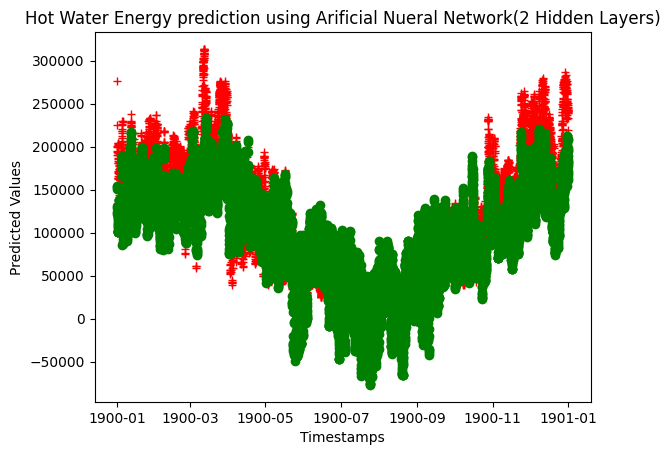

In [130]:
plt.plot(results_ANN['Timestamp'],results_ANN['Test_HWE'],'r+')
plt.plot(results_ANN['Timestamp'],results_ANN['Pred_HWE'],'go')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Hot Water Energy prediction using Arificial Nueral Network(2 Hidden Layers)')
plt.show()

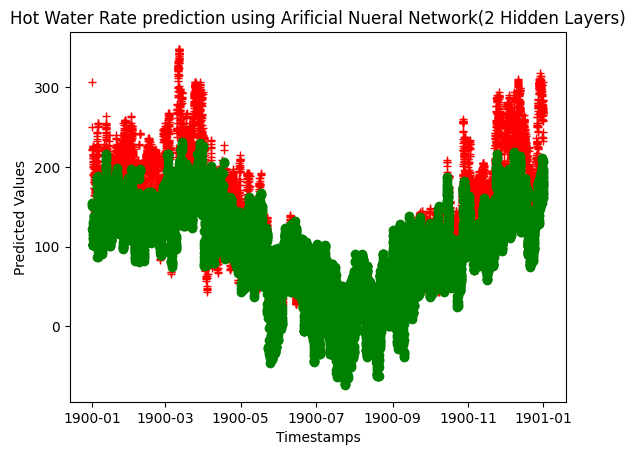

In [131]:
plt.plot(results_ANN['Timestamp'],results_ANN['Test_HWR'],'r+')
plt.plot(results_ANN['Timestamp'],results_ANN['Pred_HWR'],'go')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Hot Water Rate prediction using Arificial Nueral Network(2 Hidden Layers)')
plt.show()

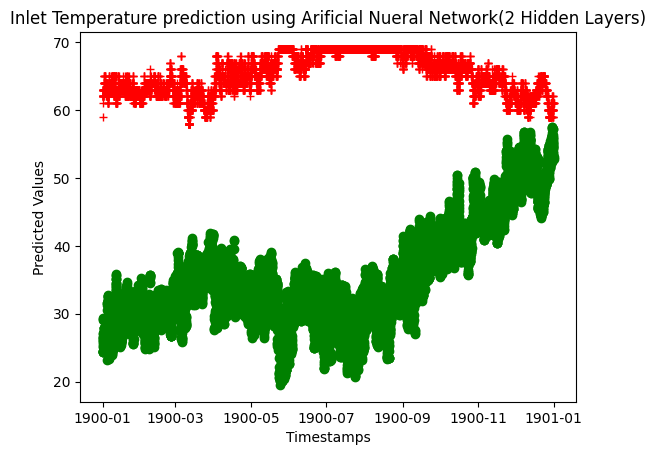

In [132]:
plt.plot(results_ANN['Timestamp'],results_ANN['Test_IT'],'r+')
plt.plot(results_ANN['Timestamp'],results_ANN['Pred_IT'],'go')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Inlet Temperature prediction using Arificial Nueral Network(2 Hidden Layers)')
plt.show()